In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D


population_size = {'2': 1189000, '2_incorrect_schools': 1189000}
# population_size = {1: 100000, 2: 100000}

num_of_results = 9


def get_data(city):
    epid_data = [pd.read_csv(f'results/' + str(city) + f'/temp_results_{i}.csv', 
                            sep='\t', dtype=int) for i in range(num_of_results)]
    data = []
    min_len = min([len(i) for i in epid_data])
    for i in range(num_of_results):
        data.append(epid_data[i]['H1N1'].values[:min_len])
    data = np.array(data)/population_size[city]*100000

    mean_data = np.mean(data, axis=0)
    days = np.linspace(1,len(mean_data), len(mean_data))
    confidence = 3*np.std(data, axis=0)
    print("Maximum day of simulation for all processed:", min_len)
    return days, data, mean_data, confidence

days_samara, data_samara, mean_data_samara, confidence_samara = get_data('2_incorrect_schools')
# chelyabinsk_old_schools_df = pd.read_csv('data/sampling_samara_25/people_sampled.txt', sep='\t')
# print(len(chelyabinsk_old_schools_df))
# chelyabinsk_df = pd.read_csv('data/sampling_chelyabinsk_25/people_sampled.txt', sep='\t')
# print(len(chelyabinsk_df))
days_chelyabinsk, data_chelyabinsk, mean_data_chelyabinsk, confidence_chelyabinsk = get_data('2')

Maximum day of simulation for all processed: 99
Maximum day of simulation for all processed: 149


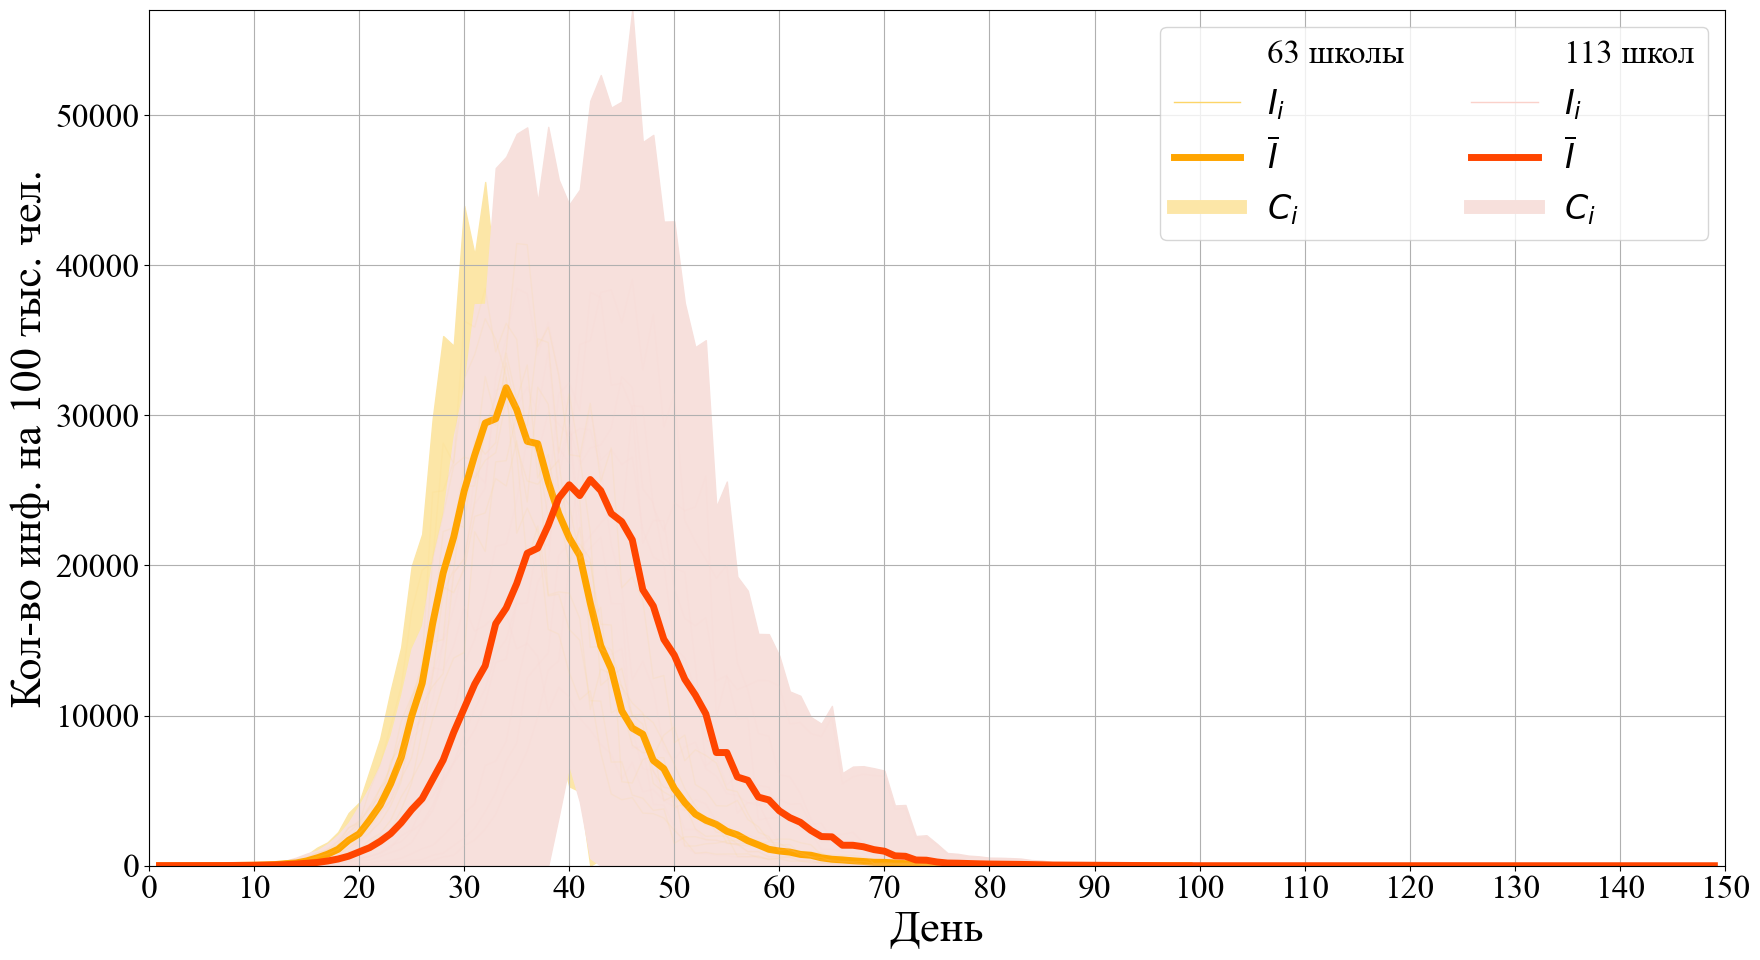

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


25725.324736005983
31838.958975796653
1.237650420452568


In [11]:
matplotlib.pyplot.rcParams.update({
    # 'text.usetex' : True,
    # 'font.family' : 'STIXGeneral',
    'font.family' : 'Times New Roman',
    })

# plt.rc('text', usetex=True ) 
# plt.rc('font',family = 'sans-serif',  size=28)

# plt.rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
# plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('font',family = 'Times New Roman',  size=20)
fig, ax = plt.subplots(figsize=(18, 10), tight_layout=True)

title_font_size = 40 
axis_font_size = 32 
ticks_font_size = 24 
legend_font_size = 24 
title_pad = 10 



def plot_city(days, data, mean_data, confidence, set_color):
    color_mean, color_line, color_error = set_color
    conf_low = [mean_data[i] - confidence[i] if mean_data[i] - confidence[i] > 0 else 0 for i in range(len(mean_data))] 

    for sample in data:
        ax.plot(days, sample, linewidth=1, color=color_line, alpha=0.1) 
    ax.plot(days, mean_data, '-', color = color_mean, linewidth=5)

    plt.fill_between(days, conf_low, mean_data + confidence,  color=color_error)

    custom_lines = [Line2D([0], [0], color='royalblue', lw=1),
                    Line2D([0], [0], color='royalblue', lw=3),
                    Line2D([0], [0], color='grey', lw=10, alpha=0.1)]

    
    ax.set_xlabel('День', fontsize=axis_font_size)
    ax.set_xlim([1,len(days)])
    ax.set_ylim([0, 57000])
    x_ticks = [10*i for i in range(int(150/10)+1)]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks, fontsize=ticks_font_size)
    y_ticks = [10000*i for i in range(6)]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks, fontsize=ticks_font_size)
    # ax.set_yticklabels(y_ticks, fontsize=ticks_font_size)

ax.plot([], [], ' ')
plot_city(days_samara, data_samara, mean_data_samara, confidence_samara, ('orange', '#fcd568', '#fce6a7'))
ax.plot([], [], ' ')
plot_city(days_chelyabinsk, data_chelyabinsk, mean_data_chelyabinsk, confidence_chelyabinsk, ('orangered', '#fad1ca', '#f7e0dc'))


custom_lines = [Line2D([0], [0], color='#ffffff', lw=0),
    Line2D([0], [0], color='#fcd568', lw=1),
    Line2D([0], [0], color='orange', lw=5),
    Line2D([0], [0], color='#fce6a7', lw=10),
    Line2D([0], [0], color='#ffffff', lw=0),
    Line2D([0], [0], color='#fad1ca', lw=1),
    Line2D([0], [0], color='orangered', lw=5),
    Line2D([0], [0], color='#f7e0dc', lw=10)]



ax.legend(custom_lines, ['63 школы', '$I_i$' , '$\overline{I}$', '$С_i$', 
                         '113 школ', '$I_i$' , '$\overline{I}$', '$С_i$'], fontsize=legend_font_size, ncol=2)
ax.set_ylabel('Кол-во инф. на 100 тыс. чел.', fontsize=axis_font_size)
ax.grid()
plt.show()

fig.savefig('output/Korzin_fig4.eps', format='eps', bbox_inches='tight')
fig.savefig('output/Korzin_fig4.png', dpi=600, bbox_inches='tight')
fig.savefig('output/Korzin_fig4.pdf', dpi=600, bbox_inches='tight')
# fig.savefig('city_compare.png'.format(city), dpi=500, bbox_inches='tight')

# fig.savefig('city_{}.png'.format(city), dpi=200, bbox_inches='tight')
# fig.savefig('city_{}.pdf'.format(city), dpi=200, bbox_inches='tight')
print(max(mean_data_chelyabinsk))
print(max(mean_data_samara))
print(max(mean_data_samara)/ max(mean_data_chelyabinsk))